# Image Classification 

**Import the Libraries**

In [67]:
#Import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import the tensorflow:
import tensorflow as tf

**Load the Dataset**

In [68]:
#Import the dataset:
fasion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# Analysis of dataset

In [69]:
#Check the shape of dataset:
print(fasion_mnist[1][0].shape)

(10000, 28, 28)


In [70]:
#Separate the dataset:
(train_images, train_labels), (test_images, test_labels) = fasion_mnist

In [71]:
#Check the dataset:
print("Train Images:", train_images.shape)
print("Train Labels:", train_labels.shape)
print("Test Images", test_images.shape)
print("Test labels:", test_labels.shape)



Train Images: (60000, 28, 28)
Train Labels: (60000,)
Test Images (10000, 28, 28)
Test labels: (10000,)


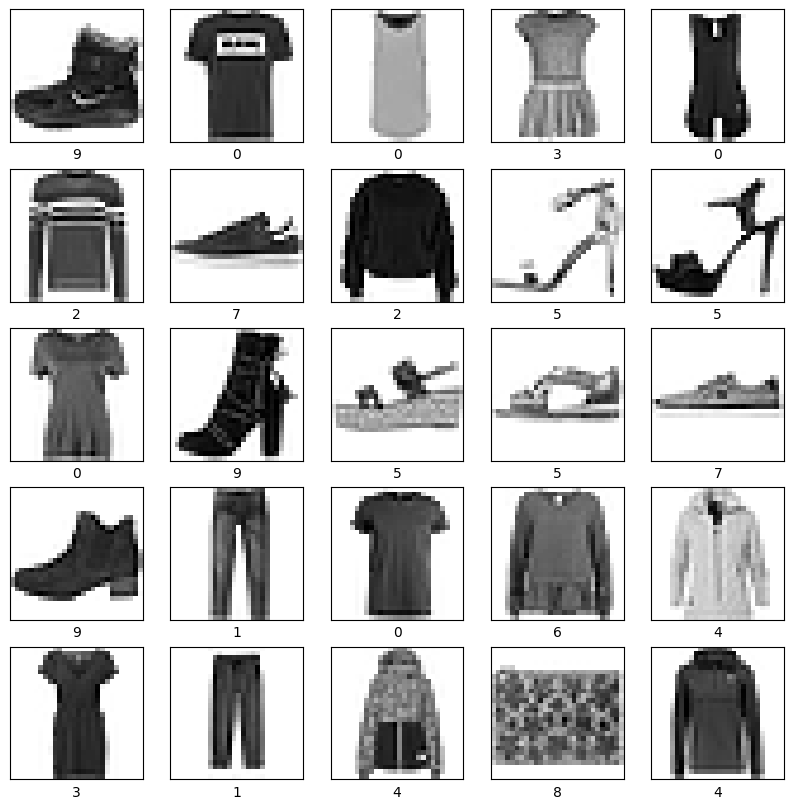

In [72]:
#Plot the dataset:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()   

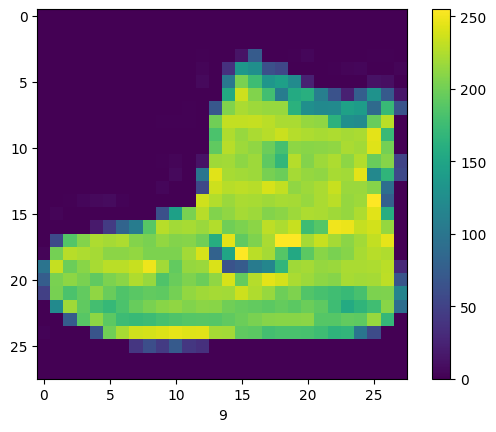

In [73]:
#Check the pixel values in dataset:
plt.imshow(train_images[0])
plt.xlabel(train_labels[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [74]:
#Print the Pixel values:
print("Pixel values:")
for row in train_images[0]:
    for pixel in row:
        print(f"{pixel:3}", end=" ")
    print()  

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 21

In [75]:
#Pixel converted into normal shape:
train_images = train_images / 255
test_images = test_images / 255

In [76]:
#Change the values into Float the form:
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 

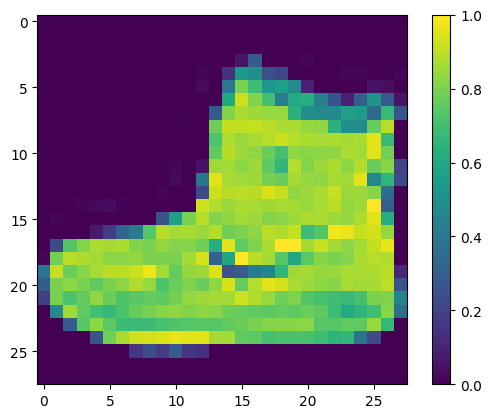

In [77]:
#Check the normalized pixel values in dataset:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [78]:
#Change the values into Float the form:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
#Print the Pixel values:
print("Pixel values:")
for row in train_images[0]:
    for pixel in row:
        print(f"{pixel:0.3}", end=" ")
    print()    

Pixel values:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.54e-05 0.0 0.0 0.0002 0.00112 0.0 0.0 1.54e-05 6.15e-05 0.0 0.0 0.0 0.0 1.54e-05 1.54e-05 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.61e-05 0.0 0.000554 0.00209 0.00195 0.000953 0.00083 0.0 0.0 0.0 1.54e-05 4.61e-05 6.15e-05 0.0 0.0 4.61e-05 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.23e-05 0.0 0.00157 0.00314 0.00271 0.00206 0.00221 0.00189 0.000354 0.0 0.0 0.0 0.0 0.000185 0.000154 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00238 0.00363 0.00318 0.00274 0.00165 0.0024 0.00248 0.00168 0.000984 0.000354 0.00118 0.002 0.00111 0.000231 
0.0 0.0 0.0 0.0 

<Figure size 640x480 with 0 Axes>

<Axes: >

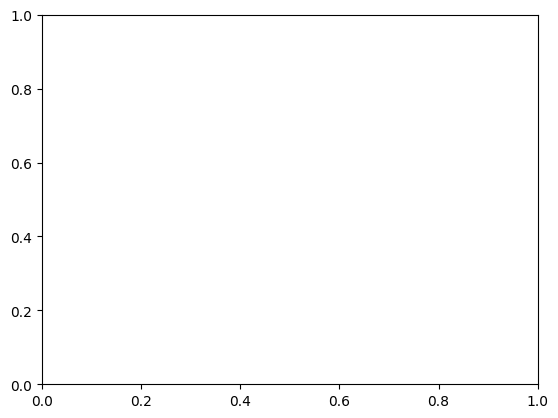

In [79]:
#reshape of dataset:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

#Display the data:
display(plt.gcf())
display(plt.gca())


# Convolutional Neural Network Model:

In [80]:
#Built the Model:
from tensorflow.keras import layers
#Create the input layer:
input_layer = layers.Input(shape=(28,28,1))
#Create the CNN Model:
model = tf.keras.Sequential([
    input_layer,   #Input layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), #Convolution layer
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3)), #Pooling Layer
    layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=4, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), #Flatten layer
    layers.Dense(10, activation='softmax') #Dense Layer
])


In [81]:
#Model summary:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 4)        │           292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,566 (25.65 KB)

 Trainable params: 6,566 (25.65 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
#Compile the model:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [83]:
#Fit the model:
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.3726 - loss: 1.6763 - val_accuracy: 0.6928 - val_loss: 0.8386
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.7027 - loss: 0.8177 - val_accuracy: 0.7348 - val_loss: 0.7198
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.7344 - loss: 0.7260 - val_accuracy: 0.7456 - val_loss: 0.6866
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.7464 - loss: 0.6870 - val_accuracy: 0.7567 - val_loss: 0.6614
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.7584 - loss: 0.6532 - val_accuracy: 0.7531 - val_loss: 0.6515
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.7665 - loss: 0.6262 - val_accuracy: 0.7676 - val_loss: 0.6162
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.7721 - loss: 0.6164 - val_accuracy: 0.7731 - val_loss: 0.6155
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.7770 -

In [84]:
#Evaluate the model:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
#Print the evaluation metrics
print(f"The value of loss function: {test_loss}.")
print(f"The value of accuracy: {test_acc}.")


313/313 - 4s - 13ms/step - accuracy: 0.7823 - loss: 0.5996
The value of loss function: 0.5996233820915222.
The value of accuracy: 0.7822999954223633.


In [85]:
#Save the model:
model.save('models_save/fasion_mnist.h5')

# Model Prediction

In [86]:
#shape of dataset:
test_labels.shape

(10000,)

In [87]:
#Shape of test data:
test_images.shape

(10000, 28, 28, 1)

In [88]:
#Predict the Images:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [89]:
#Actual Value:
test_labels[30]

8

In [90]:
#Predict the values:
predictions[0]

array([1.2201313e-06, 6.2687266e-10, 1.6296430e-07, 4.5626027e-09,
       9.1470401e-06, 8.2442731e-02, 9.3652557e-07, 3.3822539e-01,
       8.0668643e-02, 4.9865174e-01], dtype=float32)

In [91]:
#Predicted Value:
np.argmax(predictions[30])

8

### Confusion Matrix:

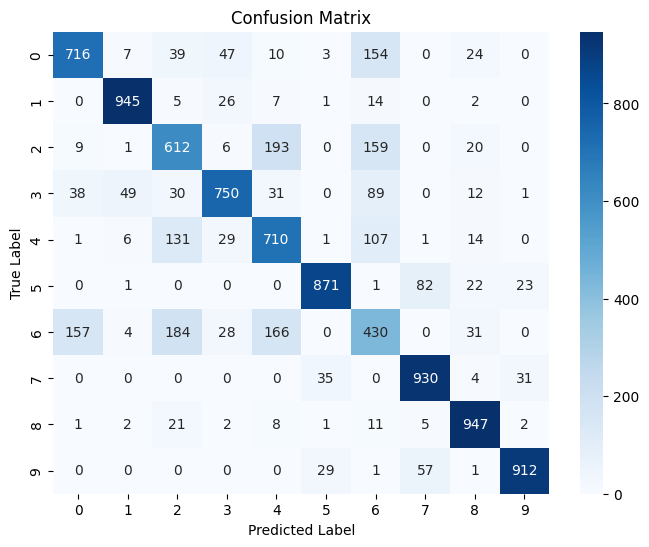

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the predictions and test_labels already
pred_cal = np.argmax(predictions, axis=1)
conf_mat = confusion_matrix(test_labels, pred_cal)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', ax=ax)

# Set the title and axis labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()